# Explore here

It's recommended to use this notebook for exploration purposes.

In [2]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
pip install pandas requests

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import requests
import time

url = "https://ycharts.com/companies/TSLA/revenues"


response = requests.get(url, headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"})
    

if response:
    soup = BeautifulSoup(response.text, 'html')
    soup












In [10]:
import requests
import time

url = "https://ycharts.com/companies/TSLA/revenues"
html_data = requests.get(url, time.sleep(10)).text

# If no information is extracted, then connect as anonymous
if "403 Forbidden" in html_data:
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    request = requests.get(url, headers = headers)
    time.sleep(10)
    html_data = request.text

html_data

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">\n<HTML><HEAD><META HTTP-EQUIV="Content-Type" CONTENT="text/html; charset=iso-8859-1">\n<TITLE>ERROR: The request could not be satisfied</TITLE>\n</HEAD><BODY>\n<H1>403 ERROR</H1>\n<H2>The request could not be satisfied.</H2>\n<HR noshade size="1px">\nRequest blocked.\nWe can\'t connect to the server for this app or website at this time. There might be too much traffic or a configuration error. Try again later, or contact the app or website owner.\n<BR clear="all">\nIf you provide content to customers through CloudFront, you can find steps to troubleshoot and help prevent this error by reviewing the CloudFront documentation.\n<BR clear="all">\n<HR noshade size="1px">\n<PRE>\nGenerated by cloudfront (CloudFront)\nRequest ID: gBK8w5UQlJBDUSmrRZYNM5MQdfxnYG0nlY1UVD8U0yk0ZNctl98YzA==\n</PRE>\n<ADDRESS>\n</ADDRESS>\n</BODY></HTML>'

In [17]:
from bs4 import BeautifulSoup

tables = soup.find_all("table")
tables

[<table class="table">
 <thead>
 <tr>
 <th>Date</th>
 <th class="text-right">Value</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>June 30, 2024</td>
 <td class="text-right">
                             
                                 25.50B
                             
                         </td>
 </tr>
 <tr>
 <td>March 31, 2024</td>
 <td class="text-right">
                             
                                 21.30B
                             
                         </td>
 </tr>
 <tr>
 <td>December 31, 2023</td>
 <td class="text-right">
                             
                                 25.17B
                             
                         </td>
 </tr>
 <tr>
 <td>September 30, 2023</td>
 <td class="text-right">
                             
                                 23.35B
                             
                         </td>
 </tr>
 <tr>
 <td>June 30, 2023</td>
 <td class="text-right">
                             
                   

In [24]:
import pandas as pd

for index, table in enumerate(tables):
    
    table_index = index
    break

# Create a DataFrame
tesla_revenue = pd.DataFrame(columns = ["Date", "Revenue"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("B", "").replace("M", "").replace(".", "").strip()
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({
            "Date": Date,
            "Revenue": Revenue
        }, index = [0])], ignore_index = True)

tesla_revenue.head()

,Date,Revenue
0,"June 30, 2024",2550
1,"March 31, 2024",2130
2,"December 31, 2023",2517
3,"September 30, 2023",2335
4,"June 30, 2023",2493


In [25]:
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue.head()

,Date,Revenue
0,"June 30, 2024",2550
1,"March 31, 2024",2130
2,"December 31, 2023",2517
3,"September 30, 2023",2335
4,"June 30, 2023",2493


In [26]:
import sqlite3

connection = sqlite3.connect("Tesla.db")
connection

In [27]:
cursor = connection.cursor()
cursor.execute("""CREATE TABLE revenue (Date, Revenue)""")

In [28]:
tesla_tuples = list(tesla_revenue.to_records(index = False))
tesla_tuples[:5]

[np.record(('June 30, 2024', '2550'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('March 31, 2024', '2130'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('December 31, 2023', '2517'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('September 30, 2023', '2335'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('June 30, 2023', '2493'), dtype=[('Date', 'O'), ('Revenue', 'O')])]

In [29]:
cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
connection.commit()

In [30]:
# Check the data from the database
for row in cursor.execute("SELECT * FROM revenue"):
    print(row)

('June 30, 2024', '2550')
('March 31, 2024', '2130')
('December 31, 2023', '2517')
('September 30, 2023', '2335')
('June 30, 2023', '2493')
('March 31, 2023', '2333')
('December 31, 2022', '2432')
('September 30, 2022', '2145')
('June 30, 2022', '1693')
('March 31, 2022', '1876')
('December 31, 2021', '1772')
('September 30, 2021', '1376')
('June 30, 2021', '1196')
('March 31, 2021', '1039')
('December 31, 2020', '1074')
('September 30, 2020', '8771')
('June 30, 2020', '6036')
('March 31, 2020', '5985')
('December 31, 2019', '7384')
('September 30, 2019', '6303')
('June 30, 2019', '635')
('March 31, 2019', '4541')
('December 31, 2018', '7226')
('September 30, 2018', '6824')
('June 30, 2018', '4002')


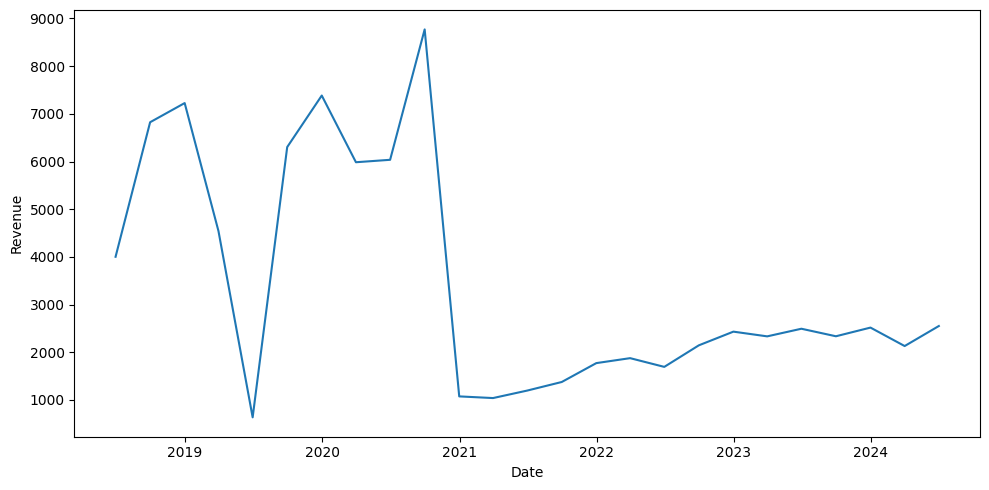

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype('int')
sns.lineplot(data = tesla_revenue, x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()

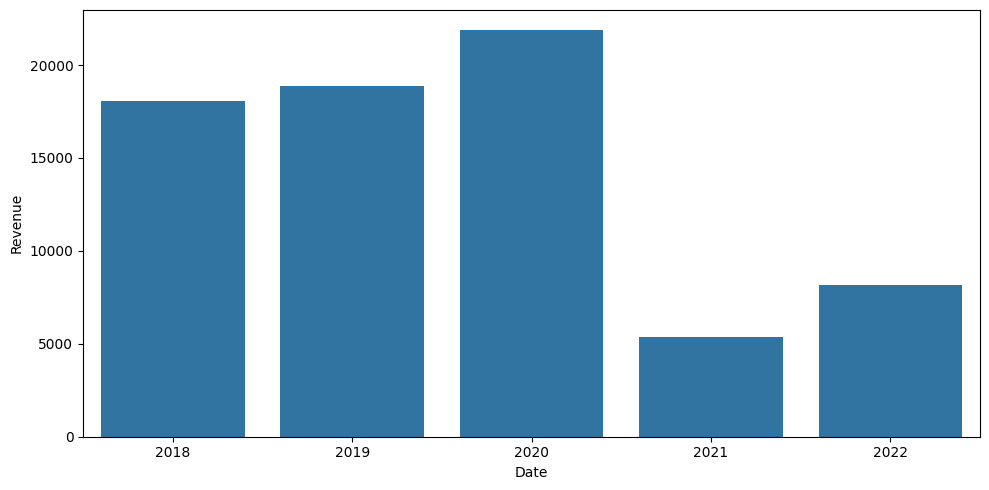

In [36]:
fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue_yearly = tesla_revenue.groupby(tesla_revenue["Date"].dt.year)["Revenue"].sum().reset_index()

sns.barplot(data = tesla_revenue_yearly[tesla_revenue_yearly["Date"] < 2023], x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()

In [33]:
tesla_revenue["Date"].dt.year

0     2024
1     2024
2     2023
3     2023
4     2023
5     2023
6     2022
7     2022
8     2022
9     2022
10    2021
11    2021
12    2021
13    2021
14    2020
15    2020
16    2020
17    2020
18    2019
19    2019
20    2019
21    2019
22    2018
23    2018
24    2018
Name: Date, dtype: int32

In [35]:
tesla_revenue.groupby(tesla_revenue["Date"].dt.year)["Revenue"].sum().reset_index()

,Date,Revenue
0,2018,18052
1,2019,18863
2,2020,21866
3,2021,5383
4,2022,8146
5,2023,9678
6,2024,4680


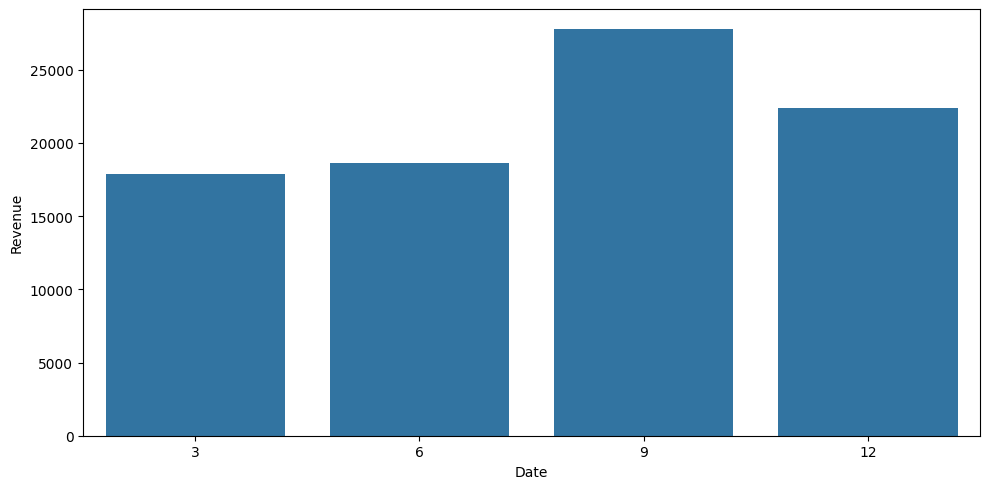

In [38]:
fig, axis = plt.subplots(figsize = (10, 5))

tesla_revenue_monthly = tesla_revenue.groupby(tesla_revenue["Date"].dt.month)["Revenue"].sum().reset_index()

sns.barplot(data = tesla_revenue_monthly, x = "Date", y = "Revenue")

plt.tight_layout()

plt.show()